In [10]:
# Импортируем все необходимые библиотеки
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [4]:
# Смотрим на первоначальные данные
df = pd.read_csv('house_sales.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info() #Проверяем тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


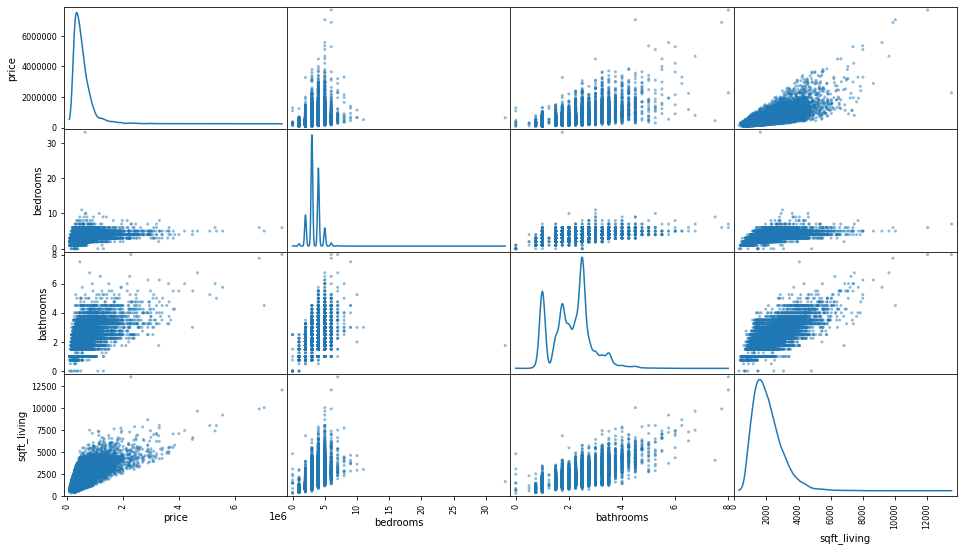

In [9]:
frame = df.iloc[:,2:6] #строим диаграмму рассеяния для некоторых переменных
scatter_matrix(frame, figsize=(16, 9), diagonal="kde") 
#scatter_matrix(frame, figsize=(16, 9), diagonal="hist") 
plt.show()

id


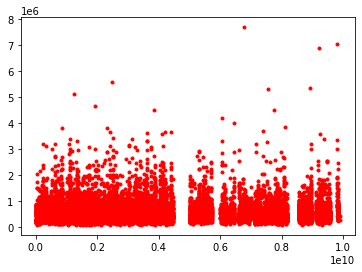

date


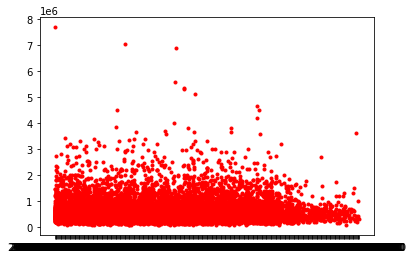

price


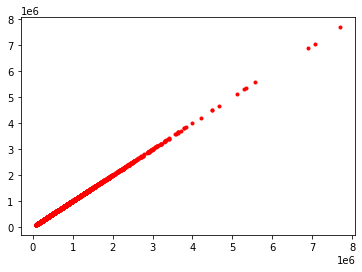

bedrooms


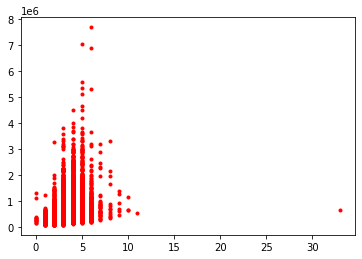

bathrooms


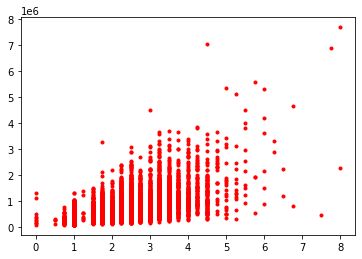

sqft_living


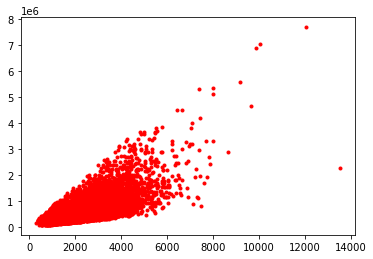

sqft_lot


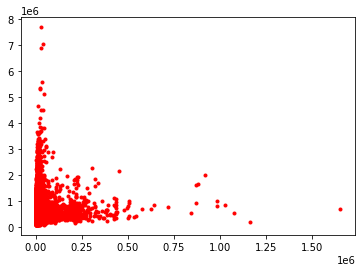

floors


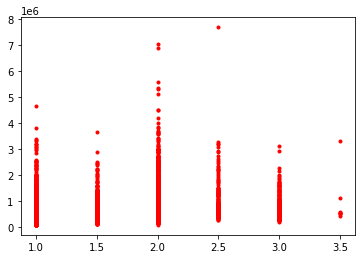

waterfront


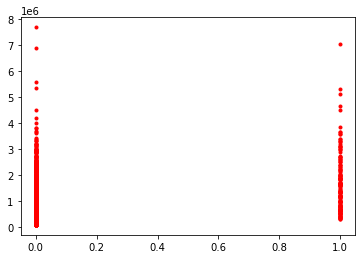

view


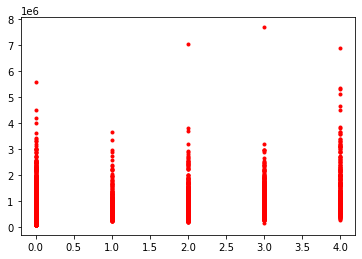

condition


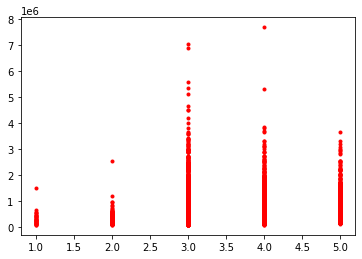

grade


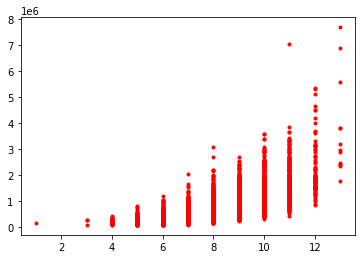

sqft_above


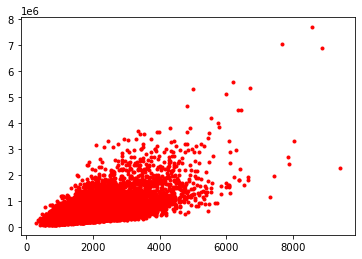

sqft_basement


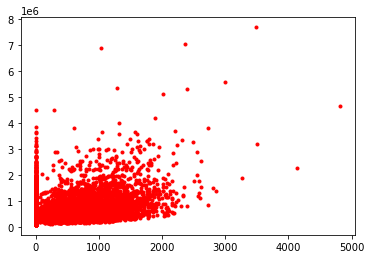

yr_built


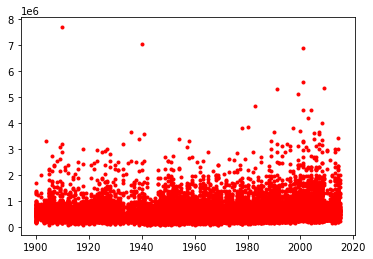

yr_renovated


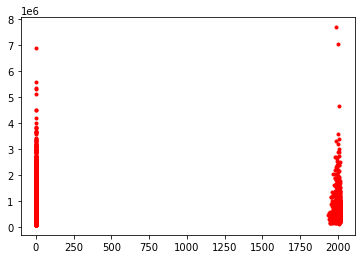

zipcode


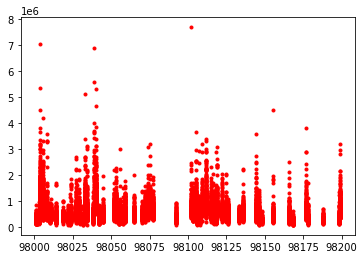

lat


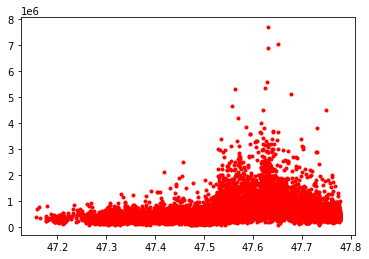

long


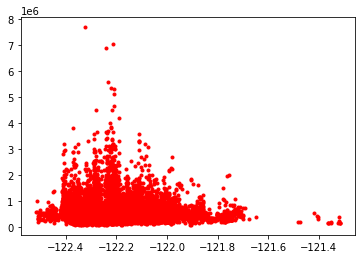

sqft_living15


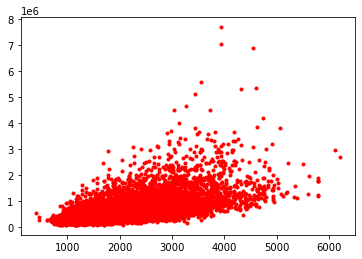

sqft_lot15


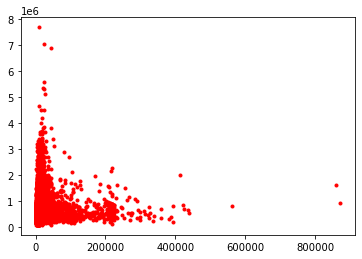

In [11]:
# Как можно увидеть - целевая переменная имеет лог-нормальное распределение
Y = df['price']
#график рассеяния
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.scatter(df[df.columns[i]], Y, c='red', marker = '.')
    plt.show()


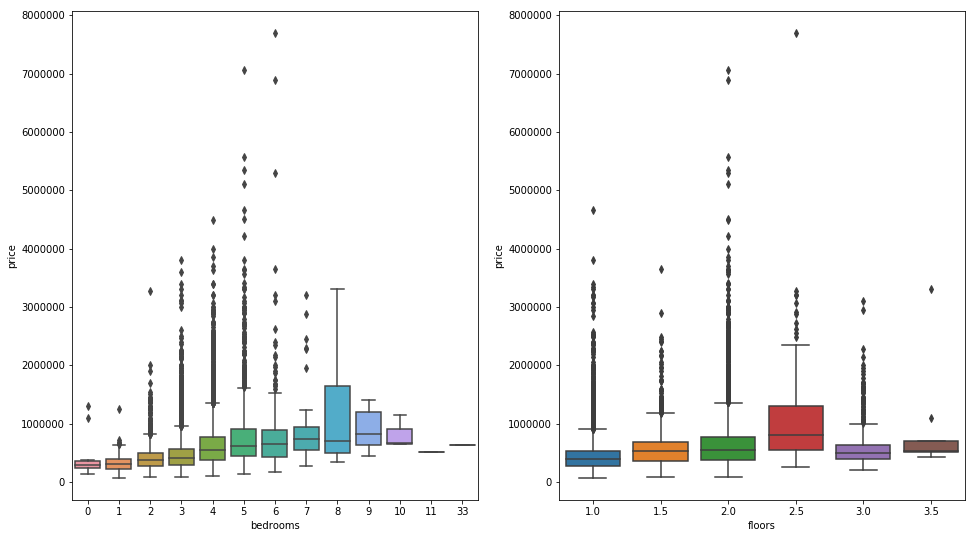

In [6]:
f, axes = plt.subplots(1, 2,figsize=(16,9)) #Строим ящик с усами
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])



In [12]:
df.isnull().any() #Проверка на нулевые значения

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [13]:
# Удаляем поле 'id'
df.drop("id", axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

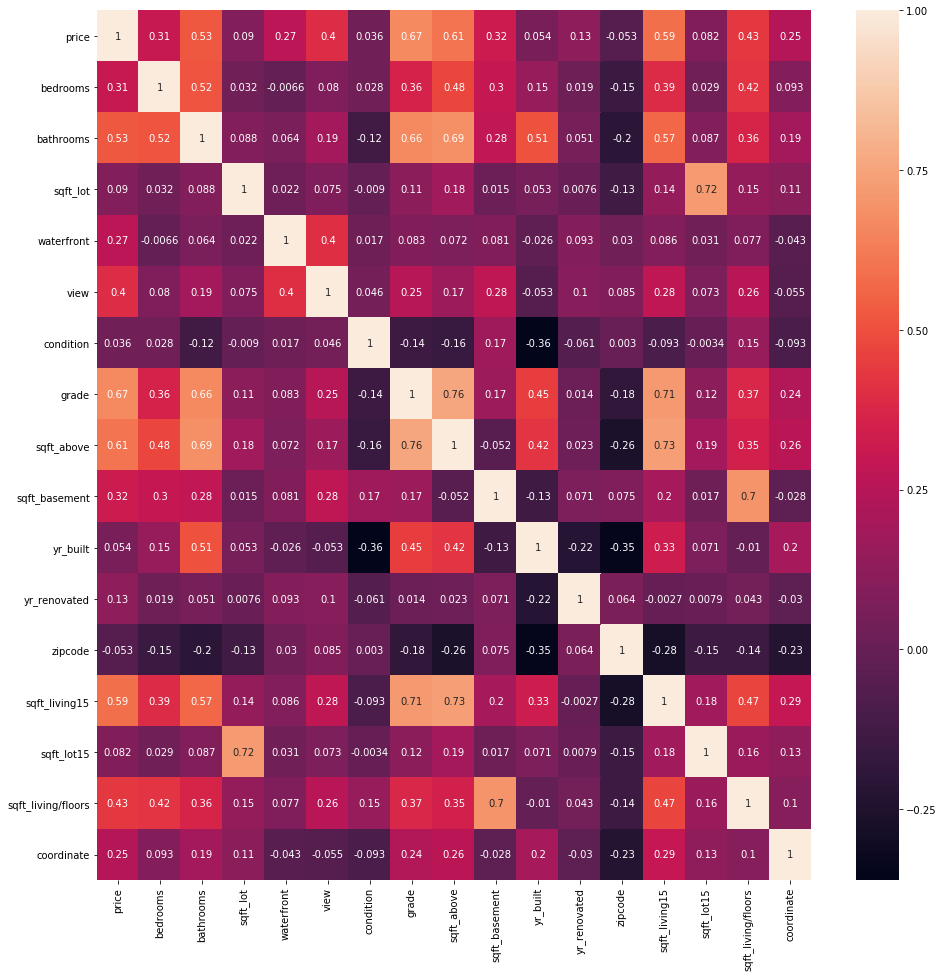

In [37]:
correlation = df.corr()
fig=plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlation, annot=True)
fig.savefig('correlation.png')

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

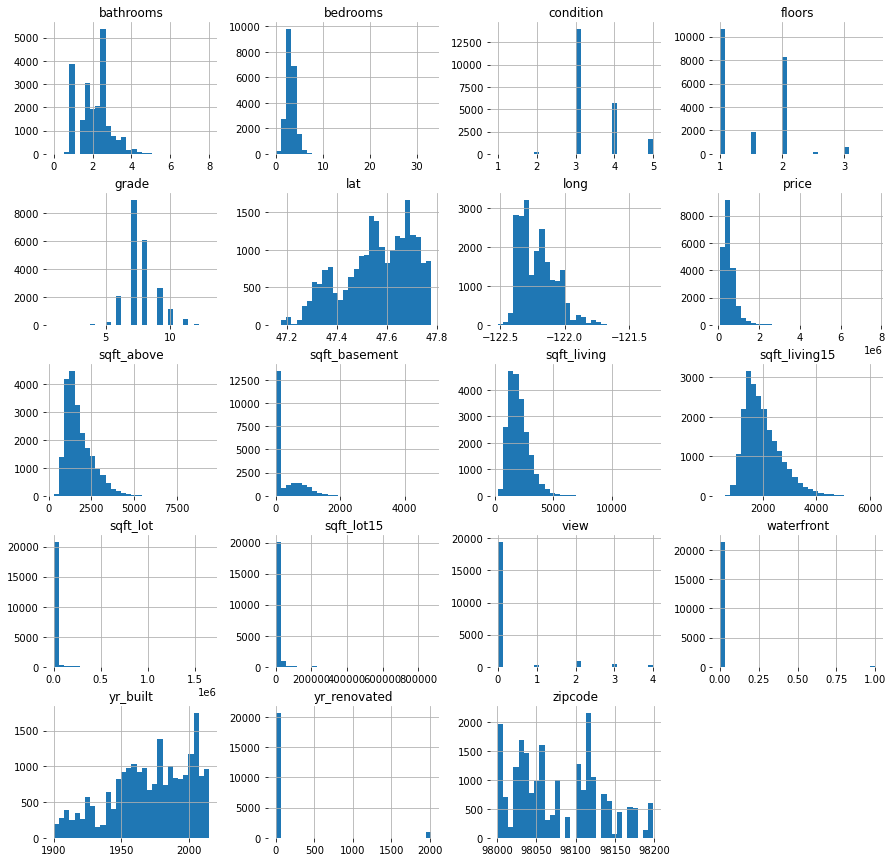

In [15]:
#Гистограмма распределения
df1=df[[
        'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot',
      'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 
      'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'
       ]]
h = df1.hist(figsize=(15,15),bins=30)
sns.despine(left=True, bottom=True)
[x.title for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

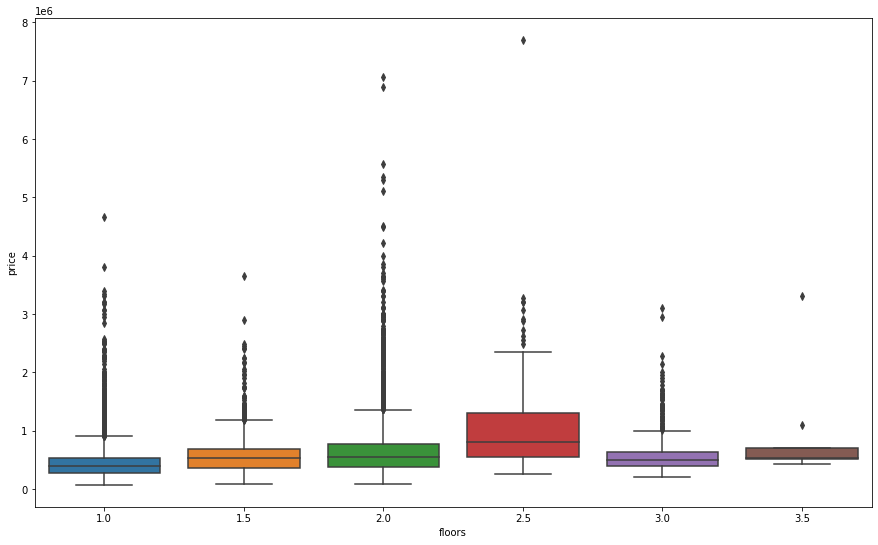

In [16]:
f = plt.subplots(figsize=(15,9))
sns.boxplot(x=df['floors'],y=df['price'])

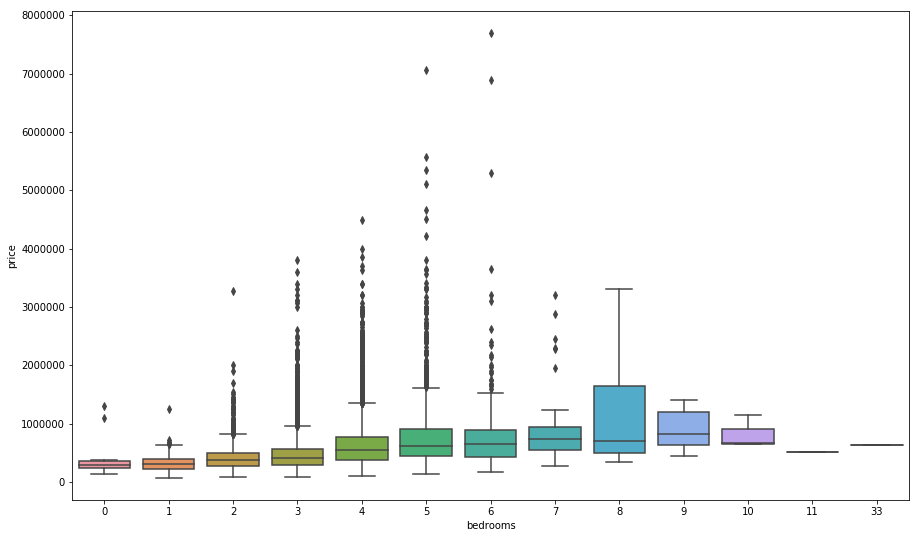

In [14]:
f = plt.subplots(figsize=(15,9))
sns.boxplot(x=df['bedrooms'],y=df['price'])
# Для 8 комнатных домов самый большой разброс в цене

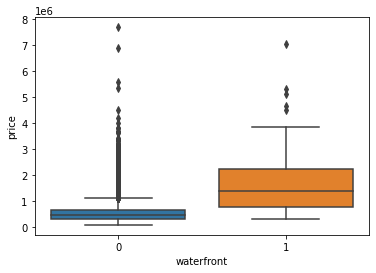

In [17]:
f = plt.subplots()
sns.boxplot(x=df['waterfront'], y=df['price'])

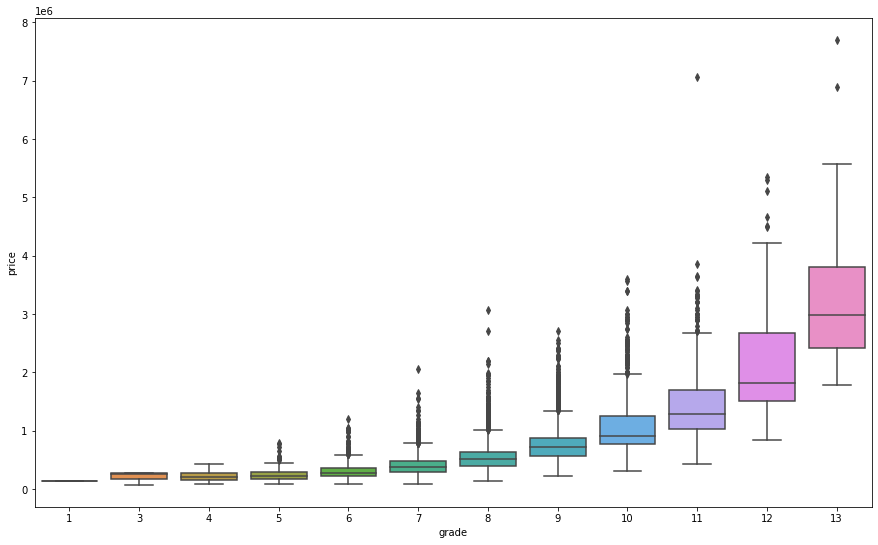

In [18]:
f = plt.subplots(figsize=(15,9))
sns.boxplot(x=df['grade'],y=df['price'])

model
buldings


In [19]:
features =["long","sqft_lot15","yr_renovated" ,"yr_built",
           "condition","sqft_lot","floors", "waterfront",
           "lat" ,"bedrooms" ,"sqft_basement" ,"view" ,
           "bathrooms","sqft_living15","sqft_above",
           "grade","sqft_living"]    
price = df['price']
price_log = np.log(price)

X = df[features ]
Y = price_log
# Делим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 6484
number of training samples: 15129


In [24]:
# L1 регрессия
for i in np.arange(0, 1, 0.1):
    RidgeModel = Ridge(alpha = i, fit_intercept = True,
                       normalize = True, tol = 0.001, solver='auto') 
    RidgeModel.fit(x_train, y_train)
    print(cross_val_score(RidgeModel, x_train, y_train, cv = 3))

    pred = RidgeModel.predict(x_test)
    accuracy = RidgeModel.score(x_test, y_test)
    print('Accuracy:{}, alpha:{}'.format(accuracy, round(i, 1)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17146e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68519e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99748e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


[0.76949482 0.76590087 0.76221356]
Accuracy:0.7698318361401243, alpha:0.0
[0.76615574 0.76264714 0.76086717]
Accuracy:0.7676368920667931, alpha:0.1
[0.75959805 0.75634491 0.75632036]
Accuracy:0.7624943958601013, alpha:0.2
[0.75159572 0.74863155 0.75008473]
Accuracy:0.7558553880589008, alpha:0.3
[0.74284172 0.74016343 0.74285235]
Accuracy:0.7483500575311256, alpha:0.4
[0.73370419 0.73129917 0.73502689]
Accuracy:0.7403400891307819, alpha:0.5
[0.72440207 0.72225605 0.72686281]
Accuracy:0.7320522896095343, alpha:0.6
[0.71507192 0.71317121 0.71852627]
Accuracy:0.7236342976577206, alpha:0.7
[0.70580066 0.70413268 0.71012786]
Accuracy:0.7151841031856219, alpha:0.8
[0.69664392 0.69519719 0.70174205]
Accuracy:0.7067674108964532, alpha:0.9


In [25]:
for i in np.arange(0,1.1,0.1):
    lasso = Lasso(alpha = i, fit_intercept = True, normalize = False,
                  max_iter = 1000, tol = 0.0001, selection = 'cyclic')
    lasso.fit(x_train, y_train)
    print(cross_val_score(lasso, x_train, y_train, cv = 3))

    pred = lasso.predict(x_test)
    accuracy = lasso.score(x_test, y_test)
    print('Accuracy:{}, alpha:{}'.format(accuracy, round(i, 1)))

<ipython-input-25-8c0163a127cc>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.7285046530785, tolerance: 0.4155541103532183
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anacon

[0.76949482 0.76590087 0.76221356]
Accuracy:0.7698318361401244, alpha:0.0
[0.5342021  0.53131669 0.55035502]
Accuracy:0.553768983879908, alpha:0.1
[0.52679338 0.52605701 0.54150612]
Accuracy:0.5464269871483358, alpha:0.2
[0.52670899 0.5257112  0.54112747]
Accuracy:0.5462760498137786, alpha:0.3
[0.52651692 0.52525365 0.54063458]
Accuracy:0.5459733753649523, alpha:0.4
[0.52623801 0.52469842 0.54003216]
Accuracy:0.545593450685234, alpha:0.5
[0.5258406  0.52402361 0.53932034]
Accuracy:0.5451068713281071, alpha:0.6
[0.52533686 0.52323869 0.53849901]
Accuracy:0.5445152762249814, alpha:0.7
[0.52472767 0.52234323 0.53756842]
Accuracy:0.5438197940133644, alpha:0.8
[0.52401173 0.52133742 0.5365283 ]
Accuracy:0.5430184715100193, alpha:0.9
[0.52318948 0.52022151 0.53537874]
Accuracy:0.5421092850059411, alpha:1.0


In [33]:
# Линейная регрессия
lr = LinearRegression(fit_intercept = True, normalize=True,
                      copy_X = True, n_jobs = 8)
lr.fit(x_train, y_train)
print(cross_val_score(lr, x_train, y_train, cv = 3))

pred = lr.predict(x_test)
accuracy = lr.score(x_test, y_test)
print('predict data ', accuracy) 

[0.76949482 0.76587962 0.76221356]
predict data  0.7698903671271472


In [34]:
# L1 + L2 Регрессия
for i in np.arange(0, 1.1, 0.1):
    en = ElasticNet(alpha = i, l1_ratio = 0.5, fit_intercept = True,
                    normalize = False, max_iter = 1000,
                    copy_X = True, tol = 0.0001, selection = 'cyclic')
    en.fit(x_train, y_train)
    print(cross_val_score(en, x_train, y_train, cv = 3))

    pred = en.predict(x_test)
    accuracy = en.score(x_test, y_test)
    print('Accuracy:{}, alpha:{}'.format(accuracy, round(i, 1)) 

<ipython-input-34-210c51c4864f>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  en.fit(x_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.7285046530785, tolerance: 0.4155541103532183
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3

[0.76949482 0.76590087 0.76221356]
Accuracy:0.7698318361401244, alpha:0.0
[0.58984408 0.59174206 0.60419232]
Accuracy:0.6118827082952931, alpha:0.1
[0.53287575 0.53041311 0.54883601]
Accuracy:0.5524703190602007, alpha:0.2
[0.52679337 0.52618602 0.54165722]
Accuracy:0.5464708663172486, alpha:0.3
[0.52679339 0.5260553  0.54150427]
Accuracy:0.5464263445317326, alpha:0.4
[0.52676655 0.52589662 0.54132357]
Accuracy:0.5463551958494911, alpha:0.5
[0.52670809 0.52570788 0.54112408]
Accuracy:0.5462742706306569, alpha:0.6
[0.52662388 0.52549039 0.54089025]
Accuracy:0.5461373099827109, alpha:0.7
[0.52651484 0.52524859 0.54062914]
Accuracy:0.5459729813373139, alpha:0.8
[0.52638671 0.52498499 0.54034046]
Accuracy:0.5457925015966164, alpha:0.9
[0.52623409 0.52469122 0.54002454]
Accuracy:0.5455882221828032, alpha:1.0


In [38]:
# Метод ближайших соседей
for i in np.arange(1, 21, 1):
    knn = KNeighborsRegressor(n_neighbors = i, weights = 'uniform',
                              leaf_size = 30, p = 2, metric='minkowski', n_jobs = 8)
    knn.fit(x_train, y_train)
    print(cross_val_score(knn, x_train, y_train, cv = 3))

    pred = knn.predict(x_test)
    accuracy = knn.score(x_test, y_test)
    print('Accuracy:{},k = {}'.format(accuracy, i)) 

[0.21869128 0.1676027  0.19571136]
Accuracy:0.21171469462373327,k = 1
[0.39682238 0.3703813  0.3859411 ]
Accuracy:0.40023271980453734,k = 2
[0.45335495 0.42929355 0.44037512]
Accuracy:0.4655058388419079,k = 3
[0.48333054 0.45914328 0.46672211]
Accuracy:0.49138492469780093,k = 4
[0.49973962 0.47885879 0.48228072]
Accuracy:0.5062684111528752,k = 5
[0.50480733 0.48873989 0.49182794]
Accuracy:0.5144993368865378,k = 6
[0.51237182 0.49484494 0.49732688]
Accuracy:0.5198396134662052,k = 7
[0.51783778 0.50007809 0.5026621 ]
Accuracy:0.5246003624122602,k = 8
[0.51977404 0.50426293 0.50687878]
Accuracy:0.5270495843093708,k = 9
[0.52271535 0.50690451 0.50658491]
Accuracy:0.5258235765153281,k = 10
[0.52229024 0.50991225 0.50726253]
Accuracy:0.525611071113615,k = 11
[0.52310407 0.51007766 0.50651104]
Accuracy:0.5283865025826133,k = 12
[0.52436989 0.51046798 0.50749656]
Accuracy:0.5299866860432925,k = 13
[0.52482438 0.50907329 0.50865049]
Accuracy:0.529831113071354,k = 14
[0.524511   0.50742802 0.509

In [37]:
# Дерево решений
for i in range(1, 15):
    dtr = DecisionTreeRegressor(criterion = 'mse', splitter = 'best',
                                max_depth = i, max_features = 8)
    dtr.fit(x_train, y_train)
    print(cross_val_score(dtr, x_train, y_train, cv = 3))

    pred = dtr.predict(x_test)
    accuracy = dtr.score(x_test, y_test)
    print('Accuracy: {}, depth:{}'.format(accuracy, i))

[0.31365735 0.30819867 0.30661138]
Accuracy: 0.31946097993848144, depth:1
[0.44233849 0.50723525 0.45900924]
Accuracy: 0.45529938183327956, depth:2
[0.64439316 0.60363816 0.62781563]
Accuracy: 0.6421690593375085, depth:3
[0.69716507 0.69551991 0.70642537]
Accuracy: 0.6981097573490895, depth:4
[0.7385595  0.71668676 0.73562296]
Accuracy: 0.7386560066836895, depth:5
[0.70694138 0.75155679 0.71450403]
Accuracy: 0.7405392763242334, depth:6
[0.75443365 0.75825471 0.777387  ]
Accuracy: 0.7928702606565742, depth:7
[0.78162499 0.79260596 0.79334367]
Accuracy: 0.7913826275137051, depth:8
[0.80550674 0.7774198  0.79218276]
Accuracy: 0.810720816175768, depth:9
[0.79923273 0.78826825 0.80087407]
Accuracy: 0.8003346802528936, depth:10
[0.79035045 0.78120961 0.78668227]
Accuracy: 0.8023420722045509, depth:11
[0.79388898 0.79611645 0.79068609]
Accuracy: 0.8136383731839902, depth:12
[0.80039921 0.76396099 0.77002007]
Accuracy: 0.7898896726867122, depth:13
[0.77731978 0.77253275 0.7737172 ]
Accuracy: 0

In [39]:
# Градиентный бустинг
for i in np.arange(0.05, 0.4, 0.05):
    gbr = GradientBoostingRegressor(loss = 'ls', learning_rate = i, n_estimators = 100,
                                    subsample = 1.0, criterion = 'friedman_mse',
                                    max_depth = 7)
    gbr.fit(x_train, y_train)
    print(cross_val_score(gbr, x_train, y_train, cv = 3))

    pred = gbr.predict(x_test)
    accuracy = gbr.score(x_test, y_test)
    print('Accuracy:{}, learning rate:{}'.format(accuracy, i))

[0.89289973 0.88950305 0.8872365 ]
Accuracy:0.8973232281951765, learning rate:0.05
[0.89383665 0.89017296 0.88912379]
Accuracy:0.9013931547359169, learning rate:0.1
[0.89169716 0.88865756 0.88868241]
Accuracy:0.9004937232243606, learning rate:0.15000000000000002
[0.88998826 0.88482833 0.88532123]
Accuracy:0.8973231845770173, learning rate:0.2
[0.88580945 0.88278485 0.88194759]
Accuracy:0.8936946551047047, learning rate:0.25
[0.88261841 0.88149062 0.87867163]
Accuracy:0.8922169590367252, learning rate:0.3
[0.8780033  0.87486257 0.87204934]
Accuracy:0.8877486565811729, learning rate:0.35000000000000003


best

In [40]:
# Обработка данных
df1 = df
df1['sqft_living']/df1['floors']

0        1180.0
1        1285.0
2         770.0
3        1960.0
4        1680.0
          ...  
21608     510.0
21609    1155.0
21610     510.0
21611     800.0
21612     510.0
Length: 21613, dtype: float64

In [41]:
df1['sqft_living/floors'] = df1['sqft_living']/df1['floors']
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living/floors
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180.0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1285.0
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770.0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960.0
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680.0


In [42]:
df1.drop("sqft_living", axis = 1, inplace = True)


In [43]:
df1.drop("floors", axis = 1, inplace = True)

In [44]:
df1.head()

,date,price,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living/floors
0,20141013T000000,221900.0,3,1.00,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180.0
1,20141209T000000,538000.0,3,2.25,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1285.0
2,20150225T000000,180000.0,2,1.00,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770.0
3,20141209T000000,604000.0,4,3.00,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960.0
4,20150218T000000,510000.0,3,2.00,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680.0


In [45]:
df1["coordinate"] = df1["long"] + df1["lat"]
df1.head()

,date,price,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living/floors,coordinate
0,20141013T000000,221900.0,3,1.00,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180.0,-74.7458
1,20141209T000000,538000.0,3,2.25,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1285.0,-74.5980
2,20150225T000000,180000.0,2,1.00,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770.0,-74.4951
3,20141209T000000,604000.0,4,3.00,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960.0,-74.8722
4,20150218T000000,510000.0,3,2.00,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680.0,-74.4282


In [46]:
df1.drop("lat", axis = 1, inplace = True)
df1.drop("long", axis = 1, inplace = True)
df1.head()

,date,price,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sqft_living/floors,coordinate
0,20141013T000000,221900.0,3,1.00,5650,0,0,3,7,1180,0,1955,0,98178,1340,5650,1180.0,-74.7458
1,20141209T000000,538000.0,3,2.25,7242,0,0,3,7,2170,400,1951,1991,98125,1690,7639,1285.0,-74.5980
2,20150225T000000,180000.0,2,1.00,10000,0,0,3,6,770,0,1933,0,98028,2720,8062,770.0,-74.4951
3,20141209T000000,604000.0,4,3.00,5000,0,0,5,7,1050,910,1965,0,98136,1360,5000,1960.0,-74.8722
4,20150218T000000,510000.0,3,2.00,8080,0,0,3,8,1680,0,1987,0,98074,1800,7503,1680.0,-74.4282


In [47]:
df1["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [48]:
len(df1["yr_renovated"])

21613

In [ ]:
df1["yr_renovated"]

In [ ]:
df1["yr_renovated"][1]='0'

In [ ]:
df1.drop("yr_renovated", axis = 1, inplace = True)
df1

In [49]:
df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'sqft_living/floors', 'coordinate'],
      dtype='object')

In [51]:
features =['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront','view', 'condition', 
           'grade', 'sqft_above', 'sqft_basement',
           'yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_living/floors','coordinate']    
price = df1['price']
price_log= np.log(price)

X = df[features ]
Y = price_log
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples : 6484
number of training samples: 15129


In [52]:
# L1 регрессия
for i in np.arange(0, 1, 0.1):
    RidgeModel = Ridge(alpha = i, fit_intercept = True,
                       normalize = True, tol = 0.001, solver='auto') 
    RidgeModel.fit(x_train, y_train)
    print(cross_val_score(RidgeModel, x_train, y_train, cv = 3))

    pred = RidgeModel.predict(x_test)
    accuracy = RidgeModel.score(x_test, y_test)
    print('Accuracy:{}, alpha:{}'.format(accuracy, round(i, 1)))

[0.70419226 0.69993392 0.71045145]
Accuracy:0.7122950348695953, alpha:0.0
[0.69739829 0.69295917 0.7044301 ]
Accuracy:0.708253055072226, alpha:0.1
[0.68548163 0.68116103 0.69334881]
Accuracy:0.6981892639993887, alpha:0.2
[0.67294827 0.66876193 0.68148056]
Accuracy:0.687007325134876, alpha:0.3
[0.66080764 0.65675564 0.66987422]
Accuracy:0.6758967515327337, alpha:0.4
[0.6492922  0.64537372 0.65880061]
Accuracy:0.6651901573771428, alpha:0.5
[0.63841648 0.63463092 0.64829911]
Accuracy:0.6549629957319107, alpha:0.6
[0.62813244 0.62447936 0.63833741]
Accuracy:0.6452066651086283, alpha:0.7
[0.61837832 0.61485733 0.62886406]
Accuracy:0.6358862089918422, alpha:0.8
[0.60909444 0.60570506 0.61982648]
Accuracy:0.6269609533933482, alpha:0.9


In [53]:
from math import exp
for i in np.arange(0,1.1,0.1):
    lasso = Lasso(alpha = i, fit_intercept = True, normalize = False,
                  max_iter = 1000, tol = 0.0001, selection = 'cyclic')
    lasso.fit(x_train, y_train)
    print(cross_val_score(lasso, x_train, y_train, cv = 3))

    pred = lasso.predict(x_test)
    accuracy = lasso.score(x_test, y_test)
    print('Accuracy:{}, alpha:{}'.format(accuracy, round(i, 1)))

<ipython-input-53-dd99023f1119>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611.5425760781194, tolerance: 0.4155541103532183
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anacon

[0.70419226 0.69993392 0.71045145]
Accuracy:0.7122950348695958, alpha:0.0
[0.53631975 0.53715059 0.55506863]
Accuracy:0.5547142762236098, alpha:0.1
[0.53461825 0.53697052 0.55136351]
Accuracy:0.5530625028405896, alpha:0.2
[0.534473   0.53666731 0.55093975]
Accuracy:0.5530435440750588, alpha:0.3
[0.53421044 0.53624096 0.55040033]
Accuracy:0.5529077819051161, alpha:0.4
[0.53383058 0.53569147 0.54974526]
Accuracy:0.5526552259521822, alpha:0.5
[0.5333334  0.53501885 0.54897452]
Accuracy:0.552285868085945, alpha:0.6
[0.5327189  0.53422308 0.54808813]
Accuracy:0.5517997101652834, alpha:0.7
[0.5319871  0.53330416 0.54708607]
Accuracy:0.5511967496138684, alpha:0.8
[0.53113799 0.5322621  0.54596836]
Accuracy:0.5504769954617958, alpha:0.9
[0.53017156 0.5310969  0.54473498]
Accuracy:0.5496404416155627, alpha:1.0


In [54]:
lr = LinearRegression(fit_intercept = True, normalize = True, copy_X = True, n_jobs=8)
lr.fit(x_train, y_train)
print(cross_val_score(lr, x_train, y_train, cv = 3))

pred=lr.predict(x_test)
accuracy=lr.score(x_test, y_test)
print('predict data ',accuracy) 

[0.70419226 0.69993392 0.71045145]
predict data  0.7122950348695958


In [56]:
# L1 + L2 Регрессия
for i in np.arange(0, 1.1, 0.1):
    en = ElasticNet(alpha = i, l1_ratio = 0.5, fit_intercept = True,
                    normalize = False, max_iter = 1000,
                    copy_X = True, tol = 0.0001, selection = 'cyclic')
    en.fit(x_train, y_train)
    print(cross_val_score(en, x_train, y_train, cv = 3))

    pred = en.predict(x_test)
    accuracy = en.score(x_test, y_test)
    print('Accuracy:{}, alpha:{}'.format(accuracy, round(i, 1)))

<ipython-input-56-78a5e096effd>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  en.fit(x_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611.5425760781194, tolerance: 0.4155541103532183
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3

[0.70419226 0.69993392 0.71045145]
Accuracy:0.7122950348695958, alpha:0.0
[0.59315939 0.59756322 0.60938896]
Accuracy:0.6146530987684553, alpha:0.1
[0.5360122  0.53715015 0.55445157]
Accuracy:0.5543937409475899, alpha:0.2
[0.53464683 0.53707501 0.55153052]
Accuracy:0.5530284682121411, alpha:0.3
[0.53461779 0.53696891 0.5513612 ]
Accuracy:0.5530625056791127, alpha:0.4
[0.53455926 0.53683187 0.55116282]
Accuracy:0.5530671709763502, alpha:0.5
[0.53447125 0.5366639  0.5509354 ]
Accuracy:0.5530424909388756, alpha:0.6
[0.53435377 0.53646501 0.55067895]
Accuracy:0.5529884560360647, alpha:0.7
[0.53420683 0.53623522 0.55039349]
Accuracy:0.552905105045203, alpha:0.8
[0.53403045 0.53597453 0.55007903]
Accuracy:0.552792434605252, alpha:0.9
[0.53382464 0.53568297 0.54973558]
Accuracy:0.5526504583993388, alpha:1.0


In [64]:
# Метод ближайших соседей
for i in np.arange(1, 21, 1):
    knn = KNeighborsRegressor(n_neighbors = i, weights = 'uniform',
                              leaf_size = 30, p = 2, metric='minkowski', n_jobs = 8)
    knn.fit(x_train, y_train)
    print(cross_val_score(knn, x_train, y_train, cv = 3))

    pred = knn.predict(x_test)
    accuracy = knn.score(x_test, y_test)
    print('Accuracy:{}, k = {}'.format(accuracy, i))
    print()

[0.21599507 0.18261673 0.17479135]
Accuracy:0.2027409709100485, k = 1

[0.37938577 0.3541749  0.36882572]
Accuracy:0.39425476269282267, k = 2

[0.44064209 0.41553707 0.43196946]
Accuracy:0.4547024615081048, k = 3

[0.47069078 0.446084   0.45770702]
Accuracy:0.4874264886172299, k = 4

[0.48591476 0.46733697 0.47003974]
Accuracy:0.5026456732713795, k = 5

[0.49187214 0.4784019  0.48145559]
Accuracy:0.5088096638921108, k = 6

[0.49486198 0.48530515 0.48502187]
Accuracy:0.5131185396469569, k = 7

[0.50202827 0.49051192 0.49275325]
Accuracy:0.5145603685036979, k = 8

[0.50666151 0.49255024 0.4926451 ]
Accuracy:0.5160975669936896, k = 9

[0.50999297 0.49424701 0.49289595]
Accuracy:0.5175452602192965, k = 10

[0.51074141 0.49604106 0.49681915]
Accuracy:0.5192934382946228, k = 11

[0.51032451 0.49769402 0.49398786]
Accuracy:0.5211255859995612, k = 12

[0.51243557 0.49808143 0.49464163]
Accuracy:0.5212327776951767, k = 13

[0.51296486 0.49624516 0.49639582]
Accuracy:0.521401095331814, k = 14

[

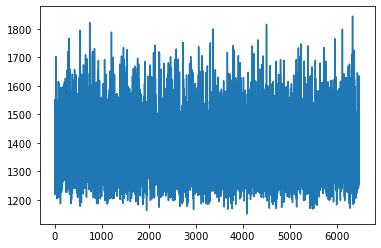

In [74]:
plt.plot(pred ** 2.81812)

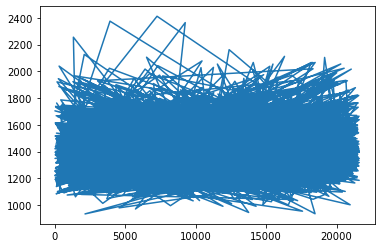

In [75]:
plt.plot(y_test ** 2.81812)

In [80]:
# Дерево решений
for i in range(1, 15):
    dtr = DecisionTreeRegressor(criterion = 'mse', splitter = 'best',
                                max_depth = i, max_features = 8)
    dtr.fit(x_train, y_train)
    print(cross_val_score(dtr, x_train, y_train, cv = 3))

    pred = dtr.predict(x_test)
    accuracy = dtr.score(x_test, y_test)
    print('Accuracy: {}, depth:{}'.format(accuracy, i))
    print(sep = ' ')

[0.23745786 0.22067055 0.3310117 ]
Accuracy: 0.3337286926573829, depth:1

[0.42240064 0.44315684 0.46471426]
Accuracy: 0.4630643608676187, depth:2

[0.54179508 0.51262076 0.53693981]
Accuracy: 0.5149039377925211, depth:3

[0.53045437 0.55927924 0.60502883]
Accuracy: 0.6130719426169228, depth:4

[0.64758991 0.62850723 0.61108345]
Accuracy: 0.6547612393106563, depth:5

[0.66869998 0.68105521 0.64046257]
Accuracy: 0.6980942185736598, depth:6

[0.66316271 0.69818305 0.69027351]
Accuracy: 0.7039766362141724, depth:7

[0.7000323  0.69027784 0.69471737]
Accuracy: 0.7326469323267117, depth:8

[0.70774009 0.69592422 0.69473581]
Accuracy: 0.7412835754754297, depth:9

[0.70735746 0.69382303 0.68911739]
Accuracy: 0.7351212556294227, depth:10

[0.70590779 0.69182299 0.67858394]
Accuracy: 0.7378991555654542, depth:11

[0.7061022  0.68438109 0.66838886]
Accuracy: 0.7183111599190387, depth:12

[0.6730239  0.65231148 0.68685346]
Accuracy: 0.7079394392096736, depth:13

[0.67407048 0.6518634  0.64763545]

In [81]:
# Градиентный бустинг
for i in np.arange(0.05, 0.4, 0.05):
    gbr = GradientBoostingRegressor(loss = 'ls', learning_rate = i, n_estimators = 100,
                                    subsample = 1.0, criterion = 'friedman_mse',
                                    max_depth = 7)
    gbr.fit(x_train, y_train)
    print(cross_val_score(gbr, x_train, y_train, cv = 3))

    pred = gbr.predict(x_test)
    accuracy = gbr.score(x_test, y_test)
    print('Accuracy:{}, learning rate:{}'.format(accuracy, i))

[0.82047821 0.81176873 0.81040448]
Accuracy:0.8305704201128096, learning rate:0.05
[0.82249882 0.81555077 0.81047114]
Accuracy:0.8334669125746328, learning rate:0.1
[0.81924974 0.81213    0.81032425]
Accuracy:0.8324853031156358, learning rate:0.15000000000000002
[0.81592135 0.80844893 0.80849388]
Accuracy:0.8294159711590047, learning rate:0.2
[0.81009724 0.79892278 0.80010846]
Accuracy:0.8261162855890092, learning rate:0.25
[0.81309    0.79529923 0.79611538]
Accuracy:0.8178793057964359, learning rate:0.3
[0.79856759 0.78758869 0.78876104]
Accuracy:0.8142977885169688, learning rate:0.35000000000000003
